In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def generate_x(omega, t, x0=0):
    xleft = x0/np.pi
    omega = int(omega/np.pi)
    x = ((xleft+omega*t)%2)
    x = x*np.pi
    return x

In [3]:
def sample_x(R,Fs,tfinal):
    omega = 2*np.pi*(R+2)
    samples = tfinal*Fs
    gap = 1.0/Fs
    xs = []
    ts = []
    ts1 = []
    i = 0
    t = 0
    while(i<samples):
        ts.append(t)
        t+=gap
        ts1.append(i+1)
        i+=1
    ts = np.around(ts,decimals=6)
    i=0
    while(i<samples):
        xs.append(generate_x(omega,ts[i]))
        i+=1
    return xs

In [4]:
def split_train_and_test(R,xs):
    X = np.zeros((len(xs),2))
    for i in range(len(xs)):
        X[i][0] = xs[i]
        X[i][1] = i+1
    np.random.seed(R+2)
    np.random.shuffle(X)
    train = X[:10,:]
    test = X[10:,:]
    return train,test

In [5]:
def plot_graphs(n,theta_n,theta_y,m,ex):
    plt.title("D = "+str(m)+", N = "+str(len(theta_n))+" "+ex)
    plt.plot(n,theta_n,'o')
    plt.plot(n,theta_y,'ro')
    
def plot_lamb_err(x,y,xlab,ylab):
    plt.plot(x,y,'ro-')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

def lasso_method(train,test,Fs,m):
    n,theta_n,n1,theta_n1,E,lambd,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    for i in range(len(train)):
        n.append(train[i][1])
        theta_n.append(train[i][0])
    
    for i in range(len(test)):
        n1.append(test[i][1])
        theta_n1.append(test[i][0])
        
    phi = np.zeros((len(train),m+1))
    phi_test = np.zeros((len(test),m+1))
    for i in range(len(test)):
        for j in range(m+1):
            phi_test[i][j] = pow(test[i][1]/Fs,j)
    for i in range(len(train)):
        for j in range(m+1):
            phi[i][j] = pow(train[i][1]/Fs,j)
    t = np.zeros((len(train),1))
    for i in range(len(train)):
        t[i][0] = train[i][0]
        
    lamb=200
    while(lamb>0.001):
        cnt=0
        weights1 = np.random.randn(m+1,1)
        conv=False
        
        
        while(conv==False):
            weights = np.zeros((m+1,1))
            for i in range(m+1):
                weights[i][0] = weights1[i][0]
            for i in range(m+1):
                rho,zee=0,0
                for j in range(len(train)):
                    rho1 = 0
                    for k in range(m+1):
                        if(k!=i):
                            rho1 += phi[j][k]*weights[k][0]
                    rho += phi[j][i]*(t[j][0]-rho1)
                    zee += phi[j][i]*phi[j][i]
                if(rho<(-lamb/2.0)):
                    weights[i][0] = (rho+lamb/2.0)/zee
                elif(rho>=(-lamb/2.0) and rho<=(lamb/2.0)):
                    weights[i][0] = 0
                else:
                    weights[i][0] = (rho-lamb/2.0)/zee
            conv=True
            diff = np.abs(np.sum(weights-weights1))
            if(diff>1e-3):
                conv=False
            weights1=weights
            
        pred = np.dot(phi,weights1)
        pred1 = np.dot(phi_test,weights1)
        theta_y,theta_y1 = [],[]
        for i in range(len(train)):
            theta_y.append(pred[i])
        for i in range(len(test)):
            theta_y1.append(pred1[i])
        print(lamb)
        print("original train data")
        plot_graphs(n,theta_n,theta_y,m,"train")
        plt.show()
        print("original test data")
        plot_graphs(n1,theta_n1,theta_y1,m,"test")
        plt.show()
        w1.append(weights1[0])
        w2.append(weights1[1])
        w3.append(weights1[2])
        w4.append(weights1[3])
        w5.append(weights1[4])
        w6.append(weights1[5])
        w7.append(weights1[6])
        w8.append(weights1[7])
        w9.append(weights1[8])
        w10.append(weights1[9])
        w11.append(weights1[10])
        lambd.append(lamb)
        E.append(np.sum(np.dot((t-np.dot(phi,weights1)).T,t-np.dot(phi,weights1)))*(1.0/len(train)))
        for i in range(m+1):
            if(weights1[i][0]==0.0):
                cnt+=1
        print(lamb,cnt)
        lamb=lamb/2
          
    return lambd,E,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11

200
original train data


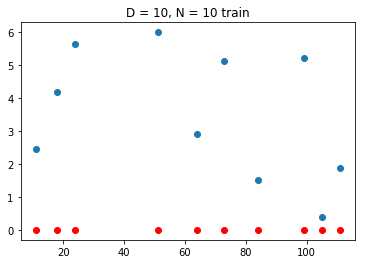

original test data


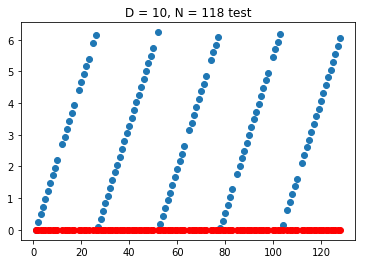

200 11
100.0
original train data


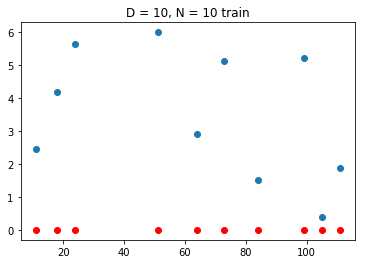

original test data


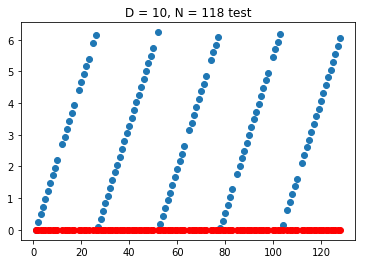

100.0 11
50.0
original train data


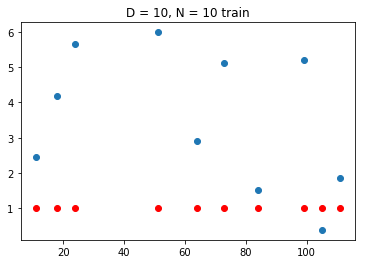

original test data


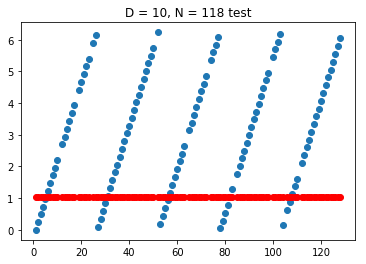

50.0 10
25.0
original train data


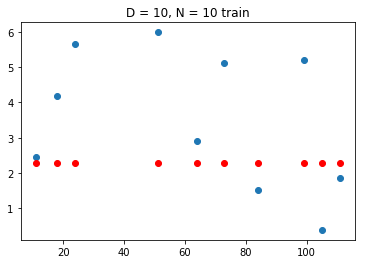

original test data


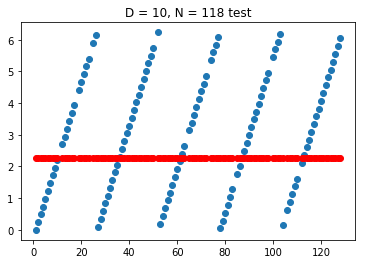

25.0 10
12.5
original train data


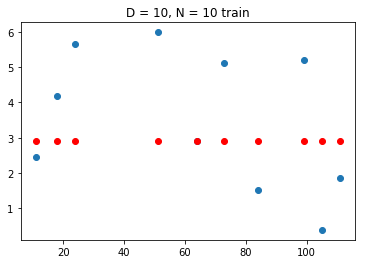

original test data


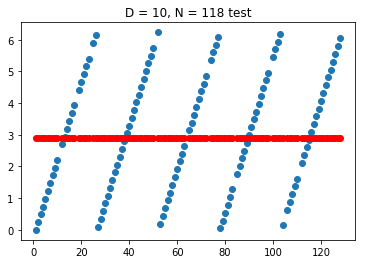

12.5 10
6.25
original train data


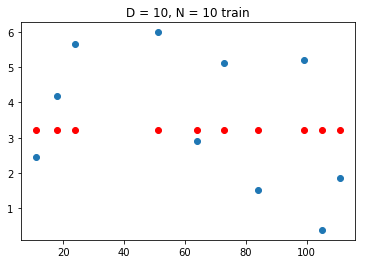

original test data


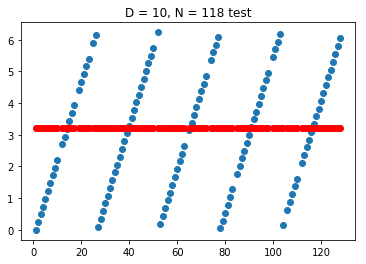

6.25 10
3.125
original train data


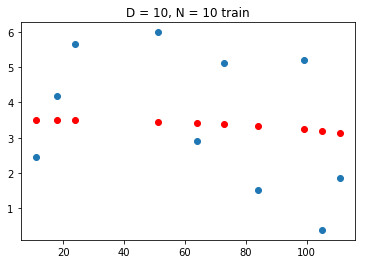

original test data


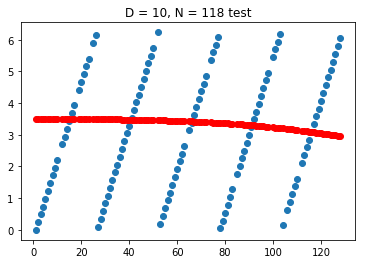

3.125 9
1.5625
original train data


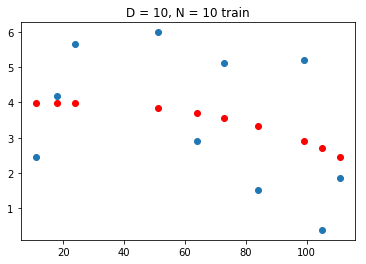

original test data


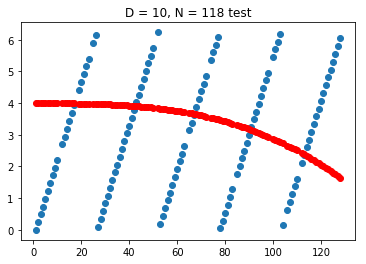

1.5625 9
0.78125
original train data


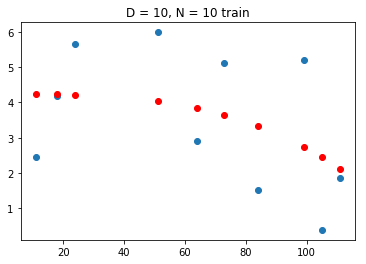

original test data


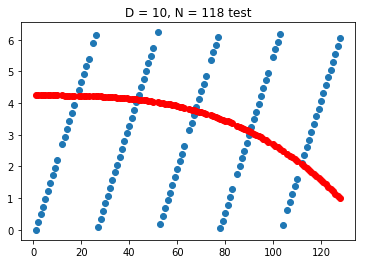

0.78125 9
0.390625
original train data


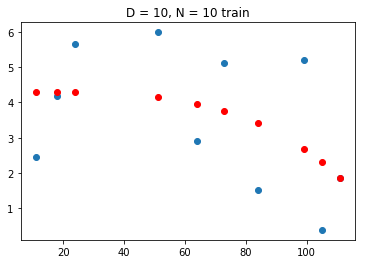

original test data


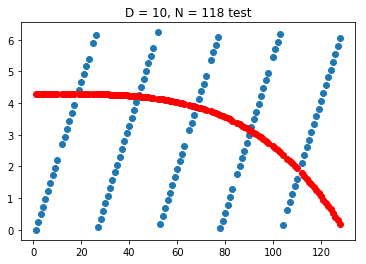

0.390625 8
0.1953125
original train data


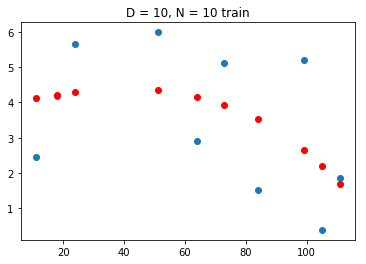

original test data


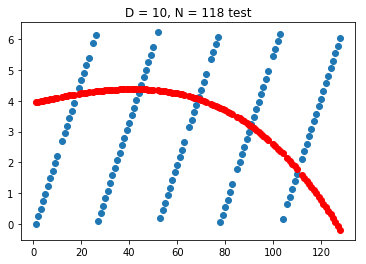

0.1953125 6
0.09765625
original train data


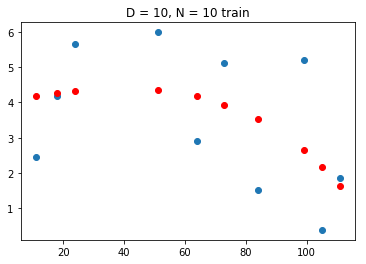

original test data


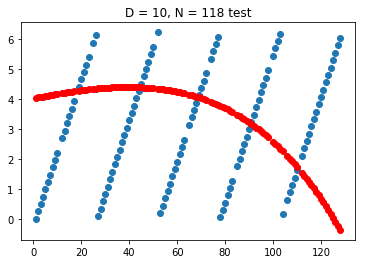

0.09765625 5
0.048828125
original train data


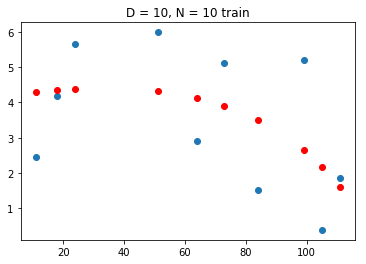

original test data


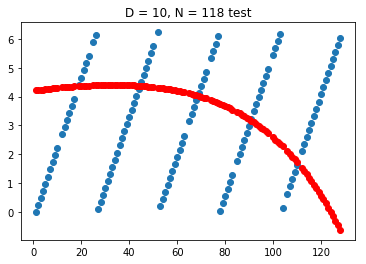

0.048828125 3
0.0244140625
original train data


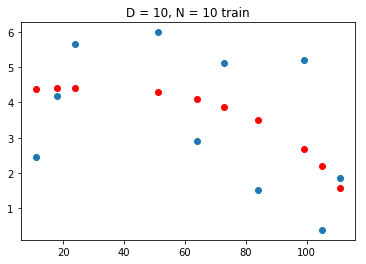

original test data


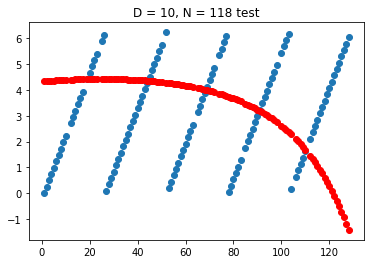

0.0244140625 1
0.01220703125
original train data


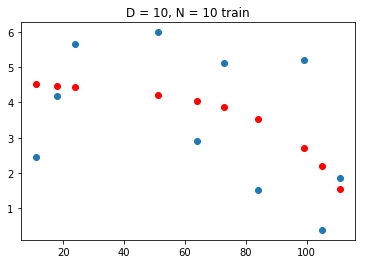

original test data


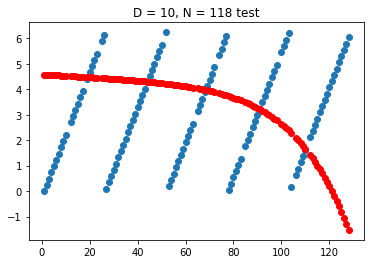

0.01220703125 1
0.006103515625
original train data


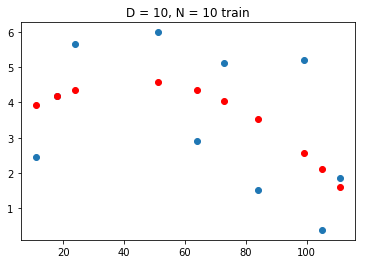

original test data


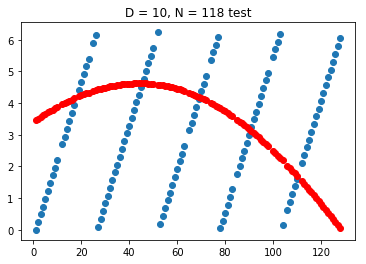

0.006103515625 2
0.0030517578125
original train data


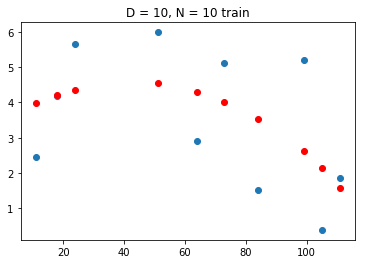

original test data


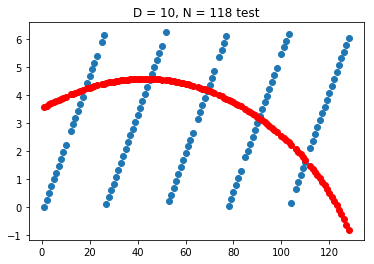

0.0030517578125 1
0.00152587890625
original train data


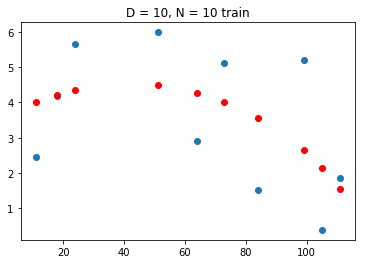

original test data


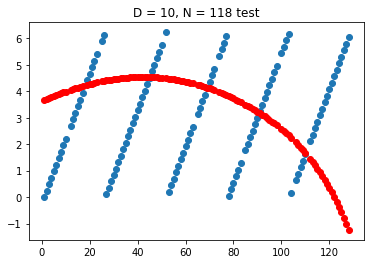

0.00152587890625 1


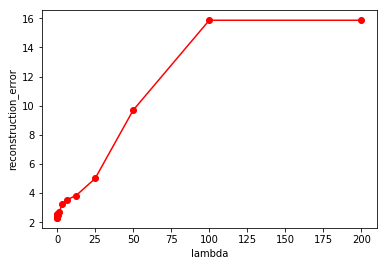

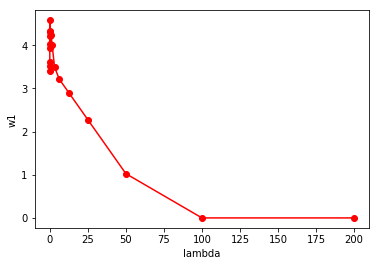

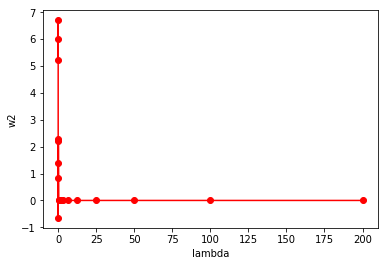

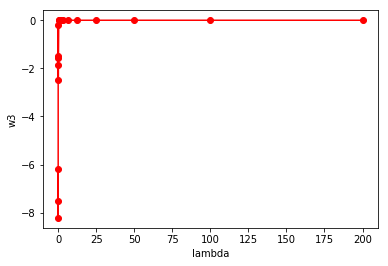

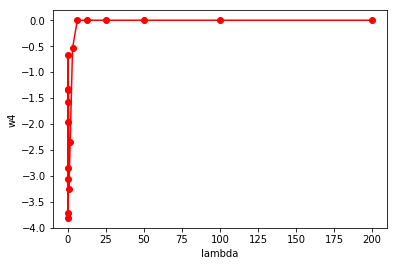

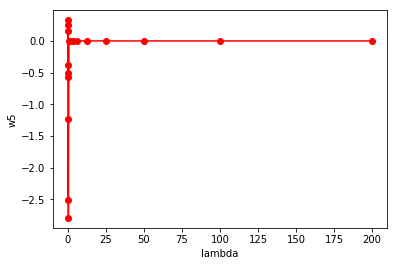

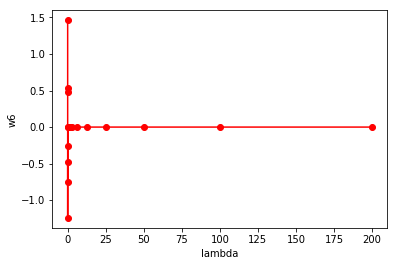

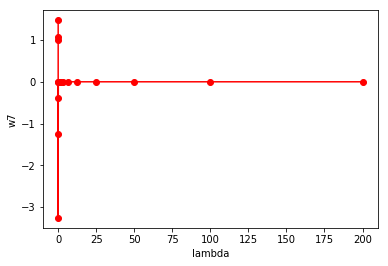

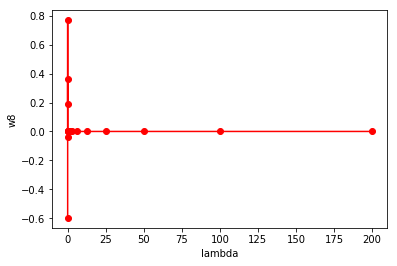

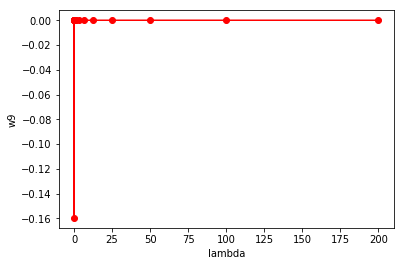

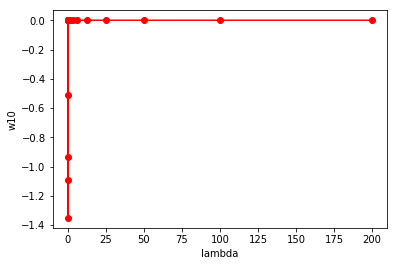

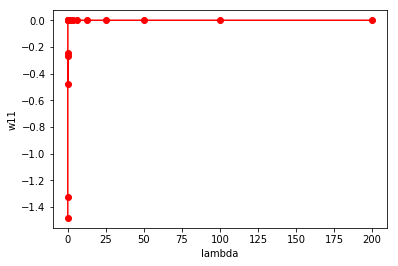

In [6]:
M = 10
xs= sample_x(3,128,1)
train,test = split_train_and_test(3,xs)
lambd,E,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11 = lasso_method(train,test,128,M)
plot_lamb_err(lambd,E,"lambda","reconstruction_error")
plot_lamb_err(lambd,w1,"lambda","w1")
plot_lamb_err(lambd,w2,"lambda","w2")
plot_lamb_err(lambd,w3,"lambda","w3")
plot_lamb_err(lambd,w4,"lambda","w4")
plot_lamb_err(lambd,w5,"lambda","w5")
plot_lamb_err(lambd,w6,"lambda","w6")
plot_lamb_err(lambd,w7,"lambda","w7")
plot_lamb_err(lambd,w8,"lambda","w8")
plot_lamb_err(lambd,w9,"lambda","w9")
plot_lamb_err(lambd,w10,"lambda","w10")
plot_lamb_err(lambd,w11,"lambda","w11")